In [1]:
import matplotlib.pyplot as plt
import copy as cp
import numpy as np
import GPy


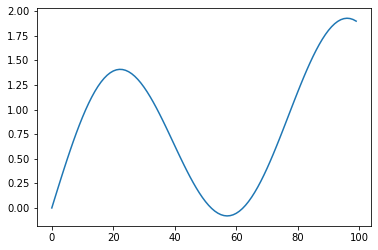

In [2]:
def test(a=1, b=1, x = np.linspace(0, 10, 100)):
    return np.sin(a*x) + np.sin(b*x)

plt.plot(test(a=0.2, b=0.8))


[3.74554342 0.93848961 2.17995315 9.75503157 0.88363739]


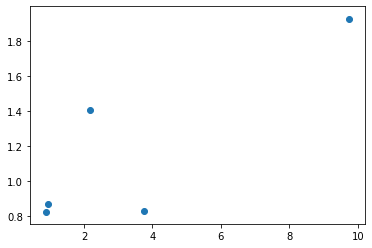

In [3]:
#Training data
training_data = np.random.uniform(low=0., high=10., size=5)
print(training_data)
training_data_y = test(a=0.2, b=0.8, x=training_data)
plt.scatter(training_data, training_data_y)


In [4]:
kernal = GPy.kern.RBF(1)


In [5]:
gp = GPy.models.GPRegression(training_data.reshape(-1, 1), training_data_y.reshape(-1, 1), kernel=kernal, noise_var=1.e-10)


In [6]:
gp.optimize(messages=True, optimizer='tnc')


Widget Javascript not detected.  It may not be installed or enabled properly.


[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

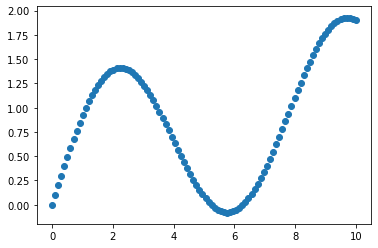

In [7]:
#Test data
test_data = np.linspace(0., 10., num=100)
print(test_data)
test_data_y = test(a=0.2, b=0.8, x=test_data)
plt.scatter(test_data, test_data_y)


In [8]:
y_predict, err_predict = gp.predict(test_data.reshape(-1, 1))


[[1.35728899e+00]
 [2.75047451e-01]
 [1.15090733e-01]
 [5.61148650e-02]
 [2.83225509e-02]
 [1.39054819e-02]
 [6.24585896e-03]
 [2.32506792e-03]
 [5.71856506e-04]
 [8.77087255e-05]
 [3.69035211e-04]
 [1.01813919e-03]
 [1.82046857e-03]
 [2.61977962e-03]
 [3.30662710e-03]
 [3.80432023e-03]
 [4.05953985e-03]
 [4.03632092e-03]
 [3.71219856e-03]
 [3.07579272e-03]
 [2.12544349e-03]
 [8.69377585e-04]
 [6.86219117e-04]
 [2.49877807e-03]
 [4.54489414e-03]
 [6.77647683e-03]
 [9.13414310e-03]
 [1.15431522e-02]
 [1.39101290e-02]
 [1.61189707e-02]
 [1.80256360e-02]
 [1.94515096e-02]
 [2.01749463e-02]
 [1.99204926e-02]
 [1.83451385e-02]
 [1.50207843e-02]
 [9.41197098e-03]
 [8.54550329e-04]
 [1.15194640e-02]
 [2.87433320e-02]
 [5.21588433e-02]
 [8.34352575e-02]
 [1.24653977e-01]
 [1.78384648e-01]
 [2.47747030e-01]
 [3.36425499e-01]
 [4.48575635e-01]
 [5.88523037e-01]
 [7.60111549e-01]
 [9.65542986e-01]
 [1.20363681e+00]
 [1.46773582e+00]
 [1.74404277e+00]
 [2.01174861e+00]
 [2.24619870e+00]
 [2.424865

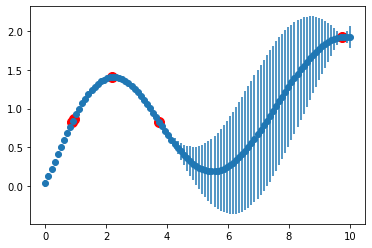

In [9]:
print(np.sqrt(err_predict)/y_predict)
plt.errorbar(x=test_data.flatten(), y=y_predict.flatten(), yerr=np.sqrt(err_predict).flatten(), ls='', marker='o')
plt.scatter(training_data, training_data_y, color='red', s=100)
